Importing the Dependencies


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_phone_files=os.listdir("/content/drive/MyDrive/new dataset/Mobile phone")
print(with_phone_files[0:5])
print(with_phone_files[-5:])


['download (1).jpeg', 'images (2).jpeg', 'images (3).jpeg', 'images (4).jpeg', 'download (2).jpeg']
['images (7).jpeg', 'images (8).jpeg', 'images (9).jpeg', 'images (10).jpeg', 'images (11).jpeg']


In [5]:
without_phone_files=os.listdir("/content/drive/MyDrive/new dataset/No Mobile Phone")
print(without_phone_files[0:5])
print(without_phone_files[-5:])

['download (1).jpeg', 'download (2).jpeg', 'download (3).jpeg', 'download (4).jpeg', 'download(5).jpeg']
['download (5).jpeg', 'download (6).jpeg', 'download (7).jpeg', 'images (7).jpeg', 'images (8).jpeg']


In [6]:
print("Number of with phone images:",len(with_phone_files))
print("Number of without phone images:",len(without_phone_files))

Number of with phone images: 16
Number of without phone images: 18


Creating labels for two class of images

In [7]:
# create the labels
with_phone_labels = [1]*16
without_phone_labels = [0]*18

In [8]:
print(with_phone_labels[0:5])
print(without_phone_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [9]:
print(len(with_phone_labels))
print(len(without_phone_labels))

16
18


In [10]:
labels=with_phone_labels+without_phone_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

34
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

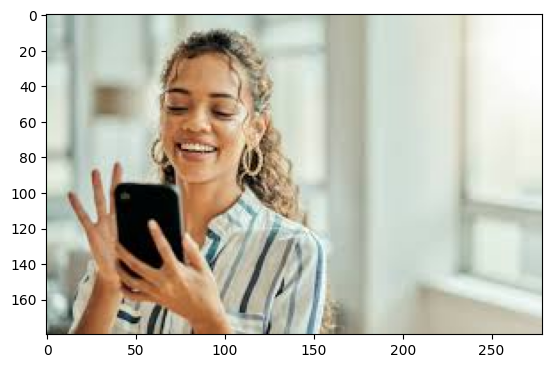

In [11]:
#display with phone image image
img=mpimg.imread("/content/drive/MyDrive/new dataset/Mobile phone/download (1).jpeg")
imgplot=plt.imshow(img)
plt.show()

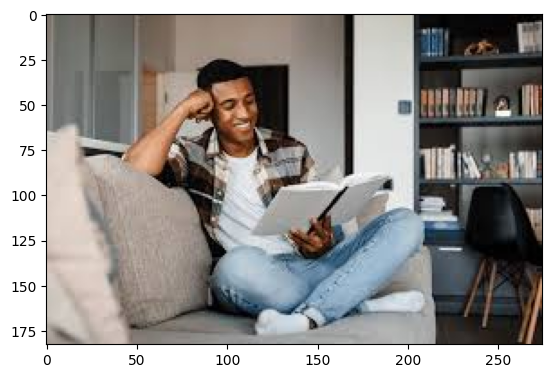

In [12]:
#display without phone image
img=mpimg.imread("/content/drive/MyDrive/new dataset/No Mobile Phone/download (1).jpeg")
imgplot=plt.imshow(img)
plt.show()

Image Processsing

In [13]:
# convert images to numpy array

with_phone_path='/content/drive/MyDrive/new dataset/Mobile phone/'
data=[]
for img_file in with_phone_files:

  image=Image.open(with_phone_path + img_file)
  image=image.resize((120,120))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

  without_phone_path='/content/drive/MyDrive/new dataset/No Mobile Phone/'

  for img_file in without_phone_files:

    image=Image.open(without_phone_path + img_file)
    image=image.resize((120,120))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)





In [14]:
len(data)

304

In [15]:
type(data)

list

array([[[179, 202, 192],
        [186, 207, 198],
        [198, 213, 205],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[178, 201, 191],
        [185, 205, 196],
        [197, 212, 204],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[176, 199, 189],
        [183, 203, 194],
        [195, 210, 202],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[143, 155, 146],
        [ 89, 100,  91],
        [ 97, 105,  95],
        ...,
        [206, 201, 186],
        [205, 201, 185],
        [204, 199, 184]],

       [[120, 130, 121],
        [ 75,  82,  73],
        [ 75,  80,  68],
        ...,
        [205, 201, 188],
        [205, 201, 189],
        [205, 201, 189]],

       [[ 72,  82,  73],
        [ 59,  66,  58],
        [ 66,  71,  60],
        ...,
        [205, 201, 188],
        [205, 201, 189],
        [205, 201, 189]]], dtype=uint8)
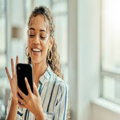

In [16]:
data[0]

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(120, 120, 3)

In [19]:
X=np.array(data)
Y=np.array(labels)

In [20]:
type(X)

numpy.ndarray

In [21]:
type(Y)

numpy.ndarray

In [22]:
print(X.shape)
print(Y.shape)

(304, 120, 120, 3)
(34,)


In [23]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Train Test Split

In [24]:
Y = Y.reshape(-1, 1) # add a dimension
Y = np.repeat(Y, X.shape[0] // Y.shape[0], axis=0)

In [25]:
# Reshape Y to have the same number of rows as X
Y = Y.reshape(-1, 1)  # add a dimension
# Calculate the number of times to repeat Y by calculating the required to get the same length of X without flooring the result
repeats = int(np.ceil(X.shape[0] / Y.shape[0]))
Y = np.repeat(Y, repeats, axis=0)
# Ensure we end up with the same length, even if it meant exceeding by a small number, we truncate
Y = Y[:X.shape[0]]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(304, 120, 120, 3) (243, 120, 120, 3) (61, 120, 120, 3)


In [28]:
# scaling the data

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255



In [29]:
X_train_scaled[0]

array([[[0.02745098, 0.18039216, 0.20784314],
        [0.02352941, 0.1372549 , 0.17647059],
        [0.01176471, 0.12156863, 0.16078431],
        ...,
        [0.29411765, 0.40784314, 0.4745098 ],
        [0.28627451, 0.39215686, 0.46666667],
        [0.2745098 , 0.38823529, 0.45490196]],

       [[0.01176471, 0.17254902, 0.19607843],
        [0.00784314, 0.12156863, 0.16078431],
        [0.        , 0.09803922, 0.1372549 ],
        ...,
        [0.27058824, 0.41960784, 0.45098039],
        [0.27843137, 0.4       , 0.41960784],
        [0.27843137, 0.38039216, 0.41176471]],

       [[0.02745098, 0.19215686, 0.21960784],
        [0.01960784, 0.14509804, 0.18039216],
        [0.        , 0.11764706, 0.15686275],
        ...,
        [0.32156863, 0.37254902, 0.38039216],
        [0.34117647, 0.35294118, 0.33333333],
        [0.35294118, 0.3254902 , 0.30196078]],

       ...,

       [[0.52156863, 0.30588235, 0.13333333],
        [0.53333333, 0.31372549, 0.16862745],
        [0.57647059, 0

array([[[  7,  46,  53],
        [  6,  35,  45],
        [  3,  31,  41],
        ...,
        [ 75, 104, 121],
        [ 73, 100, 119],
        [ 70,  99, 116]],

       [[  3,  44,  50],
        [  2,  31,  41],
        [  0,  25,  35],
        ...,
        [ 69, 107, 115],
        [ 71, 102, 107],
        [ 71,  97, 105]],

       [[  7,  49,  56],
        [  5,  37,  46],
        [  0,  30,  40],
        ...,
        [ 82,  95,  97],
        [ 87,  90,  85],
        [ 90,  83,  77]],

       ...,

       [[133,  78,  34],
        [136,  80,  43],
        [147, 103,  60],
        ...,
        [131,  87,  49],
        [129,  74,  25],
        [129,  67,   9]],

       [[132,  78,  36],
        [133,  80,  43],
        [147, 105,  64],
        ...,
        [134,  89,  52],
        [132,  77,  28],
        [131,  70,  11]],

       [[124,  72,  31],
        [124,  72,  37],
        [141, 100,  60],
        ...,
        [137,  92,  55],
        [135,  80,  31],
        [134,  73,  14]]], dtype=uint8)
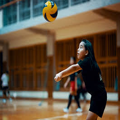

In [30]:
X_train[0]

Building a Convolutional Neural Networks(CNN)

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(120,120,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model1=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=30)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6402 - loss: 0.9408 - val_accuracy: 0.8000 - val_loss: 0.5450
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 831ms/step - accuracy: 0.7847 - loss: 0.5375 - val_accuracy: 0.8000 - val_loss: 0.5211
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 679ms/step - accuracy: 0.8122 - loss: 0.4952 - val_accuracy: 0.8000 - val_loss: 0.6026
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 688ms/step - accuracy: 0.8496 - loss: 0.4118 - val_accuracy: 0.8000 - val_loss: 0.5139
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 944ms/step - accuracy: 0.8663 - loss: 0.4542 - val_accuracy: 0.8000 - val_loss: 0.5424
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 712ms/step - accuracy: 0.8290 - loss: 0.4685 - val_accuracy: 0.8000 - val_loss: 0.5839
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 995ms/step - accuracy: 0.8111 - loss: 0.4908 - val_accuracy: 0.8000 - val_loss: 0.5126
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 667ms/step - accuracy: 0.8339 - loss: 0.4749 - val_accuracy: 0.8000 - val_loss: 0

Model Evaluation

In [35]:
loss,accuracy=model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.8381 - loss: 0.6218
Test Accuracy = 0.8196721076965332


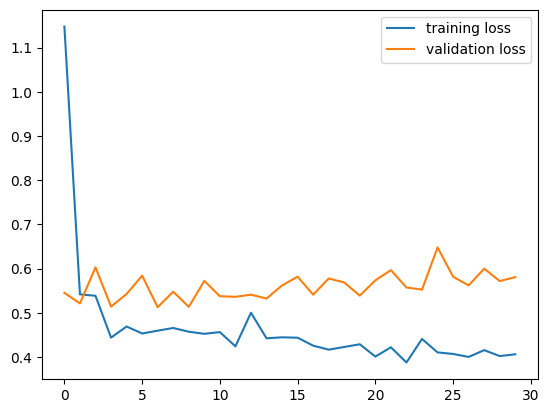

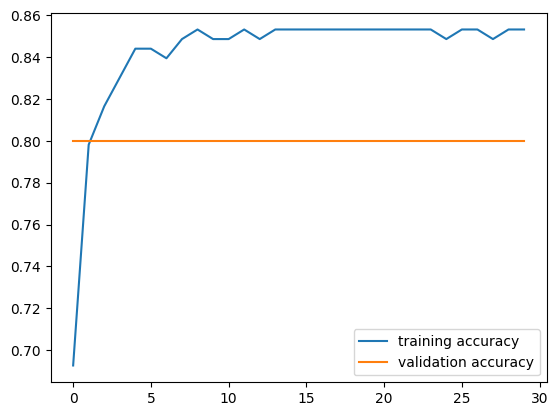

In [36]:
m=model1

#plot the loss value
plt.plot(m.history['loss'],label='training loss')
plt.plot(m.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(m.history['accuracy'],label='training accuracy')
plt.plot(m.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()


Predictive System

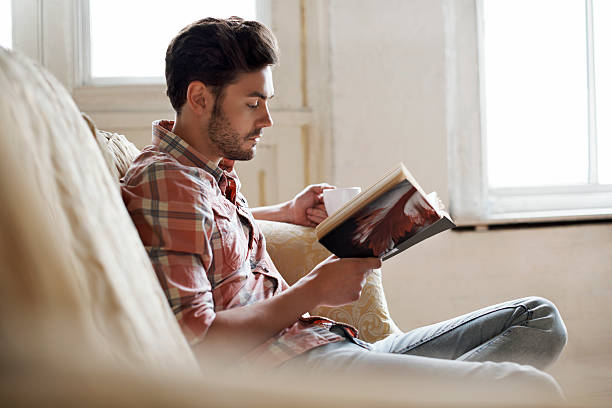

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.22775541 0.70884585]]
1
The person is not using a mobile phone


In [50]:
input_image_path="/content/image.jpg"
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(120,120))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,120,120,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The person is using mobile phone')

elif input_pred_label == 1:
  print('The person is not using a mobile phone')

